# How-to: Run circuits on Braket devices

In [1]:
from qiskit import transpile
from qiskit.circuit.random import random_circuit
from qiskit.visualization import plot_histogram

from qiskit_braket_provider import BraketProvider

Let's create random circuit

In [2]:
circuit = random_circuit(5, 3, seed=42)
circuit.draw()

┌───────┐
q_0: ───────■───────■───────────┤1      ├
          ┌─┴──┐    │           │       │
q_1: ─────┤ Sx ├─■──┼───────────┤2 Rccx ├
          └─┬──┘ │  │           │       │
q_2: ───────■────■──┼───────────┤0      ├
     ┌───┐  │    │  │U1(5.2002) └───────┘
q_3: ┤ H ├──┼────┼──■───────────────■────
     └───┘  │    │                ┌─┴─┐  
q_4: ───────■────■────────────────┤ H ├──
                                  └───┘

Get statevector simulator

In [3]:
provider = BraketProvider()
state_vector_simulator_backend = provider.get_backend("SV1")
state_vector_simulator_backend

BraketBackend[SV1]

Transpile circuit against given backend

In [4]:
transpiled_circuit = transpile(circuit, backend=state_vector_simulator_backend, seed_transpiler=42)
transpiled_circuit.draw(idle_wires=False, fold=-1)

global phase: 7π/4
                                                                                                     ┌───┐┌────────────┐     ┌───┐┌───────────┐                                                           
q_0: ────────■───────────■──────────────■────────────────────────────■────────────────────────────■──┤ X ├┤ P(-2.6001) ├─────┤ X ├┤ P(2.6001) ├──────────────────■─────────────────────────■──────────────
     ┌───┐   │P(π/8)     │              │                            │                            │  └─┬─┘└────────────┘┌───┐└─┬─┘└───────────┘┌───┐   ┌───┐   ┌─┴─┐ ┌─────┐  ┌───┐ ┌───┐┌─┴─┐┌─────┐┌───┐
q_1: ┤ H ├───■───────────┼───■──────────┼───■─────────────■──────────┼───■─────────────■──────────┼────┼─────■──────────┤ H ├──┼────────■──────┤ H ├───┤ T ├───┤ X ├─┤ Tdg ├──┤ X ├─┤ T ├┤ X ├┤ Tdg ├┤ H ├
     └───┘             ┌─┴─┐ │P(-π/8) ┌─┴─┐ │P(π/8)       │          │   │             │          │    │     │          └───┘  │        │      └───┘   └───┘   └───┘ └─────┘  └─┬─┘ └───┘└───┘└─────┘└───┘
q_2: ──────────────────┤ X ├─■────────┤ X ├─■─────────■───┼──────────┼───┼─────────■───┼──────────┼────┼─────┼─────────────────┼────────■───────────────────────────────────────■─────────────────────────
     ┌───┐┌───────────┐└───┘          └───┘           │   │          │   │         │   │          │    │     │                 │        │                                                                 
q_3: ┤ H ├┤ P(2.6001) ├───────────────────────────────┼───┼──────────┼───┼─────────┼───┼──────────┼────■─────┼─────────────────■────────┼────────────────────────■────────────────────────────────────────
     └───┘└───────────┘                             ┌─┴─┐ │P(-π/8) ┌─┴─┐ │P(π/8) ┌─┴─┐ │P(-π/8) ┌─┴─┐        │P(π/8)    ┌───┐         ┌─┴─┐    ┌────┐┌────────┐┌─┴─┐┌────────┐┌────┐                      
q_4: ───────────────────────────────────────────────┤ X ├─■────────┤ X ├─■───────┤ X ├─■────────┤ X ├────────■──────────┤ H ├─────────┤ X ├────┤ √X ├┤ P(π/4) ├┤ X ├┤ P(π/4) ├┤ √X ├──────────────────────
                                                    └───┘          └───┘         └───┘          └───┘                   └───┘         └───┘    └────┘└────────┘└───┘└────────┘└────┘

Run circuit

In [5]:
result = state_vector_simulator_backend.run(transpiled_circuit, shots=10)

/Users/caw/Documents/GitHub/qiskit-braket-provider/qiskit_braket_provider/providers/adapter.py:910: UserWarning: Device does not support global phase; global phase of 5.497787143782138 will not be included in Braket circuit
  warnings.warn(


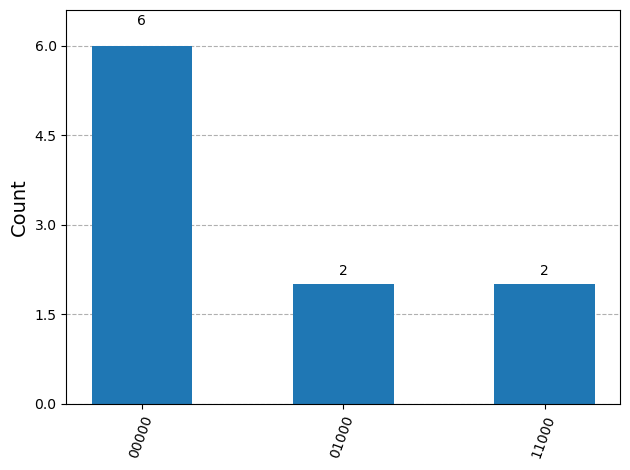

In [6]:
plot_histogram(result.result().get_counts())